<a href="https://colab.research.google.com/github/PedroAdair/PronosticoVentas/blob/main/Baseline_tienda_x2Semana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt

In [6]:
cad=data = "/content/drive/MyDrive/Utilidad/"

In [7]:
df= pd.read_excel(cad+"BaseDatos.xlsx", sheet_name='DetalleVentas')

In [8]:
df

,SKU,LOC,FECHA,UNI
0,Art02,LOC_001,2019-04-01,1
1,Art04,LOC_001,2019-04-01,1
2,Art04,LOC_002,2019-04-01,1
3,Art06,LOC_002,2019-04-01,1
4,Art08,LOC_002,2019-04-01,1
...,...,...,...,...
96671,Art04,LOC_417,2019-06-23,1
96672,Art05,LOC_417,2019-06-23,2
96673,Art06,LOC_417,2019-06-23,1
96674,Art07,LOC_417,2019-06-23,1


In [9]:
df['DIA']=df['FECHA'].dt.day_name()

In [10]:
df

,SKU,LOC,FECHA,UNI,DIA
0,Art02,LOC_001,2019-04-01,1,Monday
1,Art04,LOC_001,2019-04-01,1,Monday
2,Art04,LOC_002,2019-04-01,1,Monday
3,Art06,LOC_002,2019-04-01,1,Monday
4,Art08,LOC_002,2019-04-01,1,Monday
...,...,...,...,...,...
96671,Art04,LOC_417,2019-06-23,1,Sunday
96672,Art05,LOC_417,2019-06-23,2,Sunday
96673,Art06,LOC_417,2019-06-23,1,Sunday
96674,Art07,LOC_417,2019-06-23,1,Sunday


In [11]:
df.query("DIA == 'Sunday'" and "DIA == 'Saturday'")

,SKU,LOC,FECHA,UNI,DIA
5637,Art03,LOC_001,2019-04-06,1,Saturday
5638,Art04,LOC_001,2019-04-06,1,Saturday
5639,Art06,LOC_001,2019-04-06,2,Saturday
5640,Art07,LOC_001,2019-04-06,1,Saturday
5641,Art08,LOC_001,2019-04-06,1,Saturday
...,...,...,...,...,...
95709,Art03,LOC_420,2019-06-22,3,Saturday
95710,Art04,LOC_420,2019-06-22,1,Saturday
95711,Art05,LOC_420,2019-06-22,4,Saturday
95712,Art06,LOC_420,2019-06-22,1,Saturday


In [12]:
df_inv=pd.read_excel(cad+"BaseDatos.xlsx", sheet_name='Inventario')

In [13]:
df_inv.drop(columns=df_inv.columns[-2:],axis=1, inplace=True)

In [14]:
df_inv

,SKU,LOC,INVENTARIO_23_06_2019 FINAL DIA
0,Art04,LOC_001,10
1,Art01,LOC_001,10
2,Art02,LOC_001,5
3,Art06,LOC_001,5
4,Art08,LOC_001,5
...,...,...,...
3946,Art10,LOC_420,7
3947,Art01,LOC_420,7
3948,Art02,LOC_420,4
3949,Art04,LOC_420,4


In [15]:
print(set(df["LOC"]))

{'LOC_390', 'LOC_371', 'LOC_146', 'LOC_096', 'LOC_303', 'LOC_108', 'LOC_158', 'LOC_107', 'LOC_113', 'LOC_105', 'LOC_291', 'LOC_336', 'LOC_351', 'LOC_343', 'LOC_309', 'LOC_316', 'LOC_012', 'LOC_313', 'LOC_038', 'LOC_178', 'LOC_192', 'LOC_342', 'LOC_093', 'LOC_297', 'LOC_188', 'LOC_143', 'LOC_319', 'LOC_199', 'LOC_407', 'LOC_109', 'LOC_384', 'LOC_184', 'LOC_394', 'LOC_234', 'LOC_221', 'LOC_020', 'LOC_061', 'LOC_157', 'LOC_235', 'LOC_060', 'LOC_006', 'LOC_035', 'LOC_246', 'LOC_397', 'LOC_332', 'LOC_164', 'LOC_046', 'LOC_087', 'LOC_059', 'LOC_285', 'LOC_320', 'LOC_391', 'LOC_132', 'LOC_175', 'LOC_300', 'LOC_209', 'LOC_019', 'LOC_241', 'LOC_030', 'LOC_068', 'LOC_138', 'LOC_314', 'LOC_286', 'LOC_054', 'LOC_074', 'LOC_183', 'LOC_219', 'LOC_077', 'LOC_302', 'LOC_269', 'LOC_326', 'LOC_372', 'LOC_176', 'LOC_417', 'LOC_070', 'LOC_207', 'LOC_248', 'LOC_097', 'LOC_413', 'LOC_129', 'LOC_145', 'LOC_055', 'LOC_250', 'LOC_186', 'LOC_013', 'LOC_114', 'LOC_136', 'LOC_214', 'LOC_045', 'LOC_018', 'LOC_339'

## Baseline (Prueba)

Se filtra la base de datos para obtener los de las 2 úlitmas semanas y aplicar:

INV_BASE = 1.0 + VENTA PROMEDIO DE LAS ULTIMAS 2 SEMANAS

In [271]:
firstday= []
lastday=[]
lastday.append(df['FECHA'].max())
for i in range(2):
  firstday.append(lastday[i] - datetime.timedelta(days=6)) #13
  lastday.append(firstday[i]- datetime.timedelta(days=1))

In [272]:
firstday

[Timestamp('2019-06-17 00:00:00'), Timestamp('2019-06-10 00:00:00')]

In [273]:
lastday

[Timestamp('2019-06-23 00:00:00'),
 Timestamp('2019-06-16 00:00:00'),
 Timestamp('2019-06-09 00:00:00')]

In [284]:
for i in range(1,2):
    aux = df[(df['FECHA'] >= firstday[i-1]) & (df['FECHA'] <= lastday[i-1])]
    aux=aux.reset_index(drop=True)
    aux2 = df[(df['FECHA'] >= firstday[i]) & (df['FECHA'] <= lastday[i])]
    aux2=aux2.reset_index(drop=True)
    #Dataframe con los promedios de las 2 últimas semanas
    df_base=pd.pivot_table(aux, index = ['LOC', "SKU"], values=["UNI"], aggfunc={'sum'})
    df_base.reset_index(inplace=True)
    df_base["Tienda"] = df_base["LOC"] +" "+ df_base["SKU"]
    temp=df_base[['Tienda','UNI']]
    temp.set_index('Tienda',inplace=True)
    df_base2=pd.pivot_table(aux2, index = ['LOC', "SKU"], values=["UNI"], aggfunc={'sum'})
    df_base2.reset_index(inplace=True)
    df_base2["Tienda"] = df_base2["LOC"] +" "+ df_base2["SKU"]
    temp2=df_base2[['Tienda','UNI']]
    temp2.set_index('Tienda',inplace=True)
    dd= (temp+temp2)/2

In [285]:
#Dataframe con los promedios de las 2 últimas semanas + 1
(dd+1)

,UNI
,sum
Tienda,
LOC_001 Art01,8.0
LOC_001 Art02,4.5
LOC_001 Art03,5.0
LOC_001 Art04,4.0
LOC_001 Art06,12.0
...,...
LOC_420 Art04,12.0
LOC_420 Art05,65.0


In [287]:
(dd+1).round()

,UNI
,sum
Tienda,
LOC_001 Art01,8.0
LOC_001 Art02,4.0
LOC_001 Art03,5.0
LOC_001 Art04,4.0
LOC_001 Art06,12.0
...,...
LOC_420 Art04,12.0
LOC_420 Art05,65.0


## Baseline 13 semanas


In [292]:
firstday= []
lastday=[]
firstday.append(df['FECHA'].min())
for i in range(12):
  lastday.append(firstday[i] + datetime.timedelta(days=6)) #13
  firstday.append(lastday[i]+ datetime.timedelta(days=1))

In [293]:
firstday

[Timestamp('2019-04-01 00:00:00'),
 Timestamp('2019-04-08 00:00:00'),
 Timestamp('2019-04-15 00:00:00'),
 Timestamp('2019-04-22 00:00:00'),
 Timestamp('2019-04-29 00:00:00'),
 Timestamp('2019-05-06 00:00:00'),
 Timestamp('2019-05-13 00:00:00'),
 Timestamp('2019-05-20 00:00:00'),
 Timestamp('2019-05-27 00:00:00'),
 Timestamp('2019-06-03 00:00:00'),
 Timestamp('2019-06-10 00:00:00'),
 Timestamp('2019-06-17 00:00:00'),
 Timestamp('2019-06-24 00:00:00')]

In [294]:
lastday

[Timestamp('2019-04-07 00:00:00'),
 Timestamp('2019-04-14 00:00:00'),
 Timestamp('2019-04-21 00:00:00'),
 Timestamp('2019-04-28 00:00:00'),
 Timestamp('2019-05-05 00:00:00'),
 Timestamp('2019-05-12 00:00:00'),
 Timestamp('2019-05-19 00:00:00'),
 Timestamp('2019-05-26 00:00:00'),
 Timestamp('2019-06-02 00:00:00'),
 Timestamp('2019-06-09 00:00:00'),
 Timestamp('2019-06-16 00:00:00'),
 Timestamp('2019-06-23 00:00:00')]

In [295]:
weeks=["semana" +str(x).zfill(2) for x in range(3,15)]

In [296]:
d = {}
for i in range(1,len(weeks)):
    aux = df[(df['FECHA'] >= firstday[i-1]) & (df['FECHA'] <= lastday[i-1])]
    aux=aux.reset_index(drop=True)
    aux2 = df[(df['FECHA'] >= firstday[i]) & (df['FECHA'] <= lastday[i])]
    aux2=aux2.reset_index(drop=True)
    #Dataframe con los promedios de las 2 últimas semanas
    df_base=pd.pivot_table(aux, index = ['LOC', "SKU"], values=["UNI"], aggfunc={'sum'})
    df_base.reset_index(inplace=True)
    df_base["Tienda"] = df_base["LOC"] +" "+ df_base["SKU"]
    temp=df_base[['Tienda','UNI']]
    temp.set_index('Tienda',inplace=True)
    df_base2=pd.pivot_table(aux2, index = ['LOC', "SKU"], values=["UNI"], aggfunc={'sum'})
    df_base2.reset_index(inplace=True)
    df_base2["Tienda"] = df_base2["LOC"] +" "+ df_base2["SKU"]
    temp2=df_base2[['Tienda','UNI']]
    temp2.set_index('Tienda',inplace=True)
    d[weeks[i-1]]= (temp+temp2)/2

In [297]:
weeks=weeks[0:-1]

In [298]:
total=(pd.concat([d[x] for x in weeks],axis=1,sort=True).set_axis(labels=weeks,axis=1)).fillna(0)

In [299]:
total

,semana03,semana04,semana05,semana06,semana07,semana08,semana09,semana10,semana11,semana12,semana13
Tienda,,,,,,,,,,,
LOC_001 Art01,5.0,5.0,6.0,6.5,8.5,12.5,14.0,13.0,11.0,10.5,7.0
LOC_001 Art02,5.0,6.0,4.5,5.0,5.5,4.5,5.0,5.0,3.5,3.5,3.5
LOC_001 Art03,3.5,4.5,3.0,4.5,5.5,3.0,2.5,2.5,3.5,5.5,4.0
LOC_001 Art04,3.0,2.0,2.0,1.5,2.0,4.0,3.0,3.0,4.5,2.5,3.0
LOC_001 Art06,5.0,3.5,7.0,10.0,7.0,10.5,11.0,8.0,8.0,9.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...
LOC_420 Art04,28.5,0.0,0.0,0.0,4.5,18.0,20.5,6.5,11.0,11.0,11.0
LOC_420 Art05,71.5,0.0,0.0,58.0,75.0,84.0,52.0,26.5,38.0,52.5,64.0
LOC_420 Art06,44.0,0.0,0.0,39.5,52.0,57.0,33.5,9.0,11.5,17.5,20.0


In [300]:
total=total+1
total

,semana03,semana04,semana05,semana06,semana07,semana08,semana09,semana10,semana11,semana12,semana13
Tienda,,,,,,,,,,,
LOC_001 Art01,6.0,6.0,7.0,7.5,9.5,13.5,15.0,14.0,12.0,11.5,8.0
LOC_001 Art02,6.0,7.0,5.5,6.0,6.5,5.5,6.0,6.0,4.5,4.5,4.5
LOC_001 Art03,4.5,5.5,4.0,5.5,6.5,4.0,3.5,3.5,4.5,6.5,5.0
LOC_001 Art04,4.0,3.0,3.0,2.5,3.0,5.0,4.0,4.0,5.5,3.5,4.0
LOC_001 Art06,6.0,4.5,8.0,11.0,8.0,11.5,12.0,9.0,9.0,10.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
LOC_420 Art04,29.5,1.0,1.0,1.0,5.5,19.0,21.5,7.5,12.0,12.0,12.0
LOC_420 Art05,72.5,1.0,1.0,59.0,76.0,85.0,53.0,27.5,39.0,53.5,65.0
LOC_420 Art06,45.0,1.0,1.0,40.5,53.0,58.0,34.5,10.0,12.5,18.5,21.0


In [301]:
inventario=total.copy()

## Redondeo

Caso de 3 productos:

In [302]:
word="Art02"

In [303]:
lista02=[ele for ele in inventario.index if(word in ele)]

In [304]:
inventario.loc[lista02]=(inventario.loc[lista02]/3).round()

In [306]:
total.loc[lista02]

,semana03,semana04,semana05,semana06,semana07,semana08,semana09,semana10,semana11,semana12,semana13
Tienda,,,,,,,,,,,
LOC_001 Art02,6.0,7.0,5.5,6.0,6.5,5.5,6.0,6.0,4.5,4.5,4.5
LOC_002 Art02,4.0,3.5,4.0,3.0,2.5,1.0,1.0,4.0,5.0,4.0,3.5
LOC_003 Art02,4.5,4.5,5.5,8.0,9.0,6.5,5.5,4.5,3.0,3.5,4.5
LOC_004 Art02,4.5,3.0,3.0,3.0,2.0,2.0,4.5,7.0,8.0,5.5,4.0
LOC_005 Art02,4.5,4.5,5.0,5.0,6.5,7.0,8.5,9.5,6.5,8.5,7.0
...,...,...,...,...,...,...,...,...,...,...,...
LOC_413 Art02,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0
LOC_414 Art02,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
LOC_415 Art02,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0


In [307]:
inventario.loc[lista02]

,semana03,semana04,semana05,semana06,semana07,semana08,semana09,semana10,semana11,semana12,semana13
Tienda,,,,,,,,,,,
LOC_001 Art02,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
LOC_002 Art02,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0
LOC_003 Art02,2.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,1.0,1.0,2.0
LOC_004 Art02,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,2.0,1.0
LOC_005 Art02,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
LOC_413 Art02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
LOC_414 Art02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LOC_415 Art02,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Caso de 2 productos:

In [308]:
word="Art03"

In [309]:
lista03=[ele for ele in inventario.index if(word in ele)]

In [310]:
inventario.loc[lista03]=(inventario.loc[lista03]/2).apply(np.ceil)

In [311]:
total.loc[lista03]

,semana03,semana04,semana05,semana06,semana07,semana08,semana09,semana10,semana11,semana12,semana13
Tienda,,,,,,,,,,,
LOC_001 Art03,4.5,5.5,4.0,5.5,6.5,4.0,3.5,3.5,4.5,6.5,5.0
LOC_002 Art03,11.0,10.5,11.0,11.5,13.0,10.0,7.5,9.5,12.5,12.0,10.5
LOC_003 Art03,5.0,6.0,8.5,11.0,12.5,12.0,11.0,11.0,13.0,13.5,10.5
LOC_004 Art03,6.0,4.0,3.5,3.5,4.0,6.0,6.5,6.5,5.0,3.0,1.0
LOC_005 Art03,26.0,18.5,11.0,16.5,20.5,23.0,23.0,19.0,18.5,17.0,15.5
...,...,...,...,...,...,...,...,...,...,...,...
LOC_413 Art03,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.5
LOC_414 Art03,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
LOC_415 Art03,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [312]:
inventario.loc[lista03]

,semana03,semana04,semana05,semana06,semana07,semana08,semana09,semana10,semana11,semana12,semana13
Tienda,,,,,,,,,,,
LOC_001 Art03,3.0,3.0,2.0,3.0,4.0,2.0,2.0,2.0,3.0,4.0,3.0
LOC_002 Art03,6.0,6.0,6.0,6.0,7.0,5.0,4.0,5.0,7.0,6.0,6.0
LOC_003 Art03,3.0,3.0,5.0,6.0,7.0,6.0,6.0,6.0,7.0,7.0,6.0
LOC_004 Art03,3.0,2.0,2.0,2.0,2.0,3.0,4.0,4.0,3.0,2.0,1.0
LOC_005 Art03,13.0,10.0,6.0,9.0,11.0,12.0,12.0,10.0,10.0,9.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
LOC_413 Art03,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0
LOC_414 Art03,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
LOC_415 Art03,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [313]:
word="Art06"

In [314]:
lista06=[ele for ele in inventario.index if(word in ele)]

In [315]:
inventario.loc[lista06]=(inventario.loc[lista06]/2).apply(np.floor)

In [316]:
total.loc[lista06]

,semana03,semana04,semana05,semana06,semana07,semana08,semana09,semana10,semana11,semana12,semana13
Tienda,,,,,,,,,,,
LOC_001 Art06,6.0,4.5,8.0,11.0,8.0,11.5,12.0,9.0,9.0,10.0,12.0
LOC_002 Art06,6.0,7.0,6.0,7.0,8.5,7.0,6.0,7.0,8.5,8.0,8.5
LOC_003 Art06,3.0,4.5,5.5,6.5,5.5,3.5,3.5,3.5,3.5,4.0,4.0
LOC_004 Art06,5.0,4.0,5.0,5.5,7.0,8.0,9.0,9.0,8.5,9.5,7.5
LOC_005 Art06,6.0,5.5,6.0,7.0,6.5,8.0,9.0,8.0,6.0,6.5,6.0
...,...,...,...,...,...,...,...,...,...,...,...
LOC_414 Art06,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.5
LOC_415 Art06,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
LOC_416 Art06,3.0,1.0,1.0,2.5,2.5,3.5,4.0,4.0,3.0,1.0,1.0


In [317]:
inventario.loc[lista06]

,semana03,semana04,semana05,semana06,semana07,semana08,semana09,semana10,semana11,semana12,semana13
Tienda,,,,,,,,,,,
LOC_001 Art06,3.0,2.0,4.0,5.0,4.0,5.0,6.0,4.0,4.0,5.0,6.0
LOC_002 Art06,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0
LOC_003 Art06,1.0,2.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0
LOC_004 Art06,2.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0
LOC_005 Art06,3.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
LOC_414 Art06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
LOC_415 Art06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
LOC_416 Art06,1.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0,0.0


In [318]:
inventario=inventario.round()

Final

In [319]:
total

,semana03,semana04,semana05,semana06,semana07,semana08,semana09,semana10,semana11,semana12,semana13
Tienda,,,,,,,,,,,
LOC_001 Art01,6.0,6.0,7.0,7.5,9.5,13.5,15.0,14.0,12.0,11.5,8.0
LOC_001 Art02,6.0,7.0,5.5,6.0,6.5,5.5,6.0,6.0,4.5,4.5,4.5
LOC_001 Art03,4.5,5.5,4.0,5.5,6.5,4.0,3.5,3.5,4.5,6.5,5.0
LOC_001 Art04,4.0,3.0,3.0,2.5,3.0,5.0,4.0,4.0,5.5,3.5,4.0
LOC_001 Art06,6.0,4.5,8.0,11.0,8.0,11.5,12.0,9.0,9.0,10.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
LOC_420 Art04,29.5,1.0,1.0,1.0,5.5,19.0,21.5,7.5,12.0,12.0,12.0
LOC_420 Art05,72.5,1.0,1.0,59.0,76.0,85.0,53.0,27.5,39.0,53.5,65.0
LOC_420 Art06,45.0,1.0,1.0,40.5,53.0,58.0,34.5,10.0,12.5,18.5,21.0


In [320]:
inventario

,semana03,semana04,semana05,semana06,semana07,semana08,semana09,semana10,semana11,semana12,semana13
Tienda,,,,,,,,,,,
LOC_001 Art01,6.0,6.0,7.0,8.0,10.0,14.0,15.0,14.0,12.0,12.0,8.0
LOC_001 Art02,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
LOC_001 Art03,3.0,3.0,2.0,3.0,4.0,2.0,2.0,2.0,3.0,4.0,3.0
LOC_001 Art04,4.0,3.0,3.0,2.0,3.0,5.0,4.0,4.0,6.0,4.0,4.0
LOC_001 Art06,3.0,2.0,4.0,5.0,4.0,5.0,6.0,4.0,4.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
LOC_420 Art04,30.0,1.0,1.0,1.0,6.0,19.0,22.0,8.0,12.0,12.0,12.0
LOC_420 Art05,72.0,1.0,1.0,59.0,76.0,85.0,53.0,28.0,39.0,54.0,65.0
LOC_420 Art06,22.0,0.0,0.0,20.0,26.0,29.0,17.0,5.0,6.0,9.0,10.0


In [321]:
pr=inventario.T["LOC_420 Art10"]

In [322]:
pr2=inventario.T.iloc[:,0]

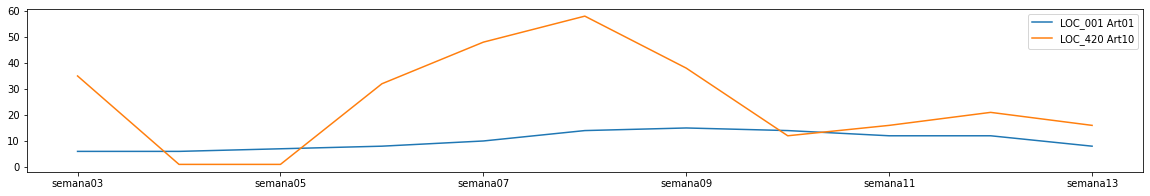

In [323]:
pr2.plot(figsize=(20,3))
pr.plot(figsize=(20,3))
plt.legend()

## Inventario existente semana 13


In [324]:
df_inv

,SKU,LOC,INVENTARIO_23_06_2019 FINAL DIA,Tienda
0,Art04,LOC_001,10,LOC_001 Art04
1,Art01,LOC_001,10,LOC_001 Art01
2,Art02,LOC_001,5,LOC_001 Art02
3,Art06,LOC_001,5,LOC_001 Art06
4,Art08,LOC_001,5,LOC_001 Art08
...,...,...,...,...
3946,Art10,LOC_420,7,LOC_420 Art10
3947,Art01,LOC_420,7,LOC_420 Art01
3948,Art02,LOC_420,4,LOC_420 Art02
3949,Art04,LOC_420,4,LOC_420 Art04


In [325]:
df_inv["Tienda"] = df_inv["LOC"] +" "+ df_inv["SKU"]
temp_inv=df_inv[['Tienda','INVENTARIO_23_06_2019 FINAL DIA']]

In [326]:
temp_inv.set_index('Tienda',inplace=True)
temp_inv=temp_inv.sort_index()

In [327]:
inventario[["semana13"]]

,semana13
Tienda,
LOC_001 Art01,8.0
LOC_001 Art02,2.0
LOC_001 Art03,3.0
LOC_001 Art04,4.0
LOC_001 Art06,6.0
...,...
LOC_420 Art04,12.0
LOC_420 Art05,65.0
LOC_420 Art06,10.0


In [328]:
temp_inv

,INVENTARIO_23_06_2019 FINAL DIA
Tienda,
LOC_001 Art01,10
LOC_001 Art02,5
LOC_001 Art03,0
LOC_001 Art04,10
LOC_001 Art06,5
...,...
LOC_420 Art04,4
LOC_420 Art05,10
LOC_420 Art06,10


In [329]:
new=pd.concat([temp_inv, inventario[["semana13"]]],axis=1,sort=True)

In [330]:
new

,INVENTARIO_23_06_2019 FINAL DIA,semana13
Tienda,,
LOC_001 Art01,10,8.0
LOC_001 Art02,5,2.0
LOC_001 Art03,0,3.0
LOC_001 Art04,10,4.0
LOC_001 Art06,5,6.0
...,...,...
LOC_420 Art04,4,12.0
LOC_420 Art05,10,65.0
LOC_420 Art06,10,10.0


In [331]:
new["INVENTARIO_23_06_2019 FINAL DIA"]- new["semana13"]

Tienda
LOC_001 Art01     2.0
LOC_001 Art02     3.0
LOC_001 Art03    -3.0
LOC_001 Art04     6.0
LOC_001 Art06    -1.0
                 ... 
LOC_420 Art04    -8.0
LOC_420 Art05   -55.0
LOC_420 Art06     0.0
LOC_420 Art07   -11.0
LOC_420 Art10    -9.0
Length: 3951, dtype: float64